### Importar modulos importantes

In [3]:
# 1. Import PyTorch, numpy and matplotlib

import numpy as np
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms 
from torch import nn
import torch.nn.functional as F
# solo se usa con el modulo secuencial y se quiere dar un nombre a la capa
from collections import OrderedDict
# Importa el optimizador de algoritmos
from torch import optim

### Importar data y transformarla en un tensor

In [4]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the training data
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

### Definir arquitectura de la red y criterios de optimización y perdida

In [5]:

model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)


### Entrenamiento de nuestra red

In [6]:
epochs = 15
steps = 0
train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vec tor
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad() ## starts the gradient in zero
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in testloader:
                images = images.view(images.shape[0], -1)
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)         
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/15..  Training Loss: 2.245..  Test Loss: 2.135..  Test Accuracy: 0.430
Epoch: 2/15..  Training Loss: 1.685..  Test Loss: 1.121..  Test Accuracy: 0.708
Epoch: 3/15..  Training Loss: 0.835..  Test Loss: 0.659..  Test Accuracy: 0.811
Epoch: 4/15..  Training Loss: 0.570..  Test Loss: 0.502..  Test Accuracy: 0.857
Epoch: 5/15..  Training Loss: 0.458..  Test Loss: 0.420..  Test Accuracy: 0.878
Epoch: 6/15..  Training Loss: 0.402..  Test Loss: 0.390..  Test Accuracy: 0.886
Epoch: 7/15..  Training Loss: 0.371..  Test Loss: 0.359..  Test Accuracy: 0.896
Epoch: 8/15..  Training Loss: 0.349..  Test Loss: 0.339..  Test Accuracy: 0.902
Epoch: 9/15..  Training Loss: 0.332..  Test Loss: 0.323..  Test Accuracy: 0.907
Epoch: 10/15..  Training Loss: 0.318..  Test Loss: 0.307..  Test Accuracy: 0.912
Epoch: 11/15..  Training Loss: 0.304..  Test Loss: 0.299..  Test Accuracy: 0.913
Epoch: 12/15..  Training Loss: 0.292..  Test Loss: 0.290..  Test Accuracy: 0.915
Epoch: 13/15..  Training Loss: 0.282.

### Verificar los resultados del entrenamiento

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

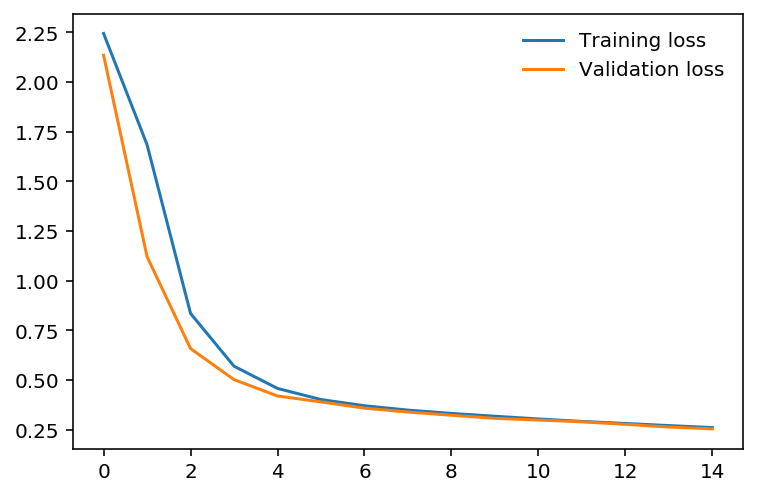

In [8]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

### Evitar el Overfitting

In [10]:
model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Dropout(p=0.2),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Dropout(p=0.2),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Dropout(p=0.2),
                      nn.Linear(64, 10),
                      nn.Dropout(p=0.2),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [11]:
epochs = 15
steps = 0
train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vec tor
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad() ## starts the gradient in zero
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in testloader:
                images = images.view(images.shape[0], -1)
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)         
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/15..  Training Loss: 2.270..  Test Loss: 2.212..  Test Accuracy: 0.272
Epoch: 2/15..  Training Loss: 2.014..  Test Loss: 1.700..  Test Accuracy: 0.459
Epoch: 3/15..  Training Loss: 1.427..  Test Loss: 1.241..  Test Accuracy: 0.576
Epoch: 4/15..  Training Loss: 1.120..  Test Loss: 1.032..  Test Accuracy: 0.644
Epoch: 5/15..  Training Loss: 0.957..  Test Loss: 0.900..  Test Accuracy: 0.691
Epoch: 6/15..  Training Loss: 0.859..  Test Loss: 0.821..  Test Accuracy: 0.717
Epoch: 7/15..  Training Loss: 0.793..  Test Loss: 0.766..  Test Accuracy: 0.734
Epoch: 8/15..  Training Loss: 0.748..  Test Loss: 0.720..  Test Accuracy: 0.752
Epoch: 9/15..  Training Loss: 0.700..  Test Loss: 0.682..  Test Accuracy: 0.762
Epoch: 10/15..  Training Loss: 0.667..  Test Loss: 0.655..  Test Accuracy: 0.772
Epoch: 11/15..  Training Loss: 0.642..  Test Loss: 0.631..  Test Accuracy: 0.779
Epoch: 12/15..  Training Loss: 0.624..  Test Loss: 0.609..  Test Accuracy: 0.785
Epoch: 13/15..  Training Loss: 0.598.

In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

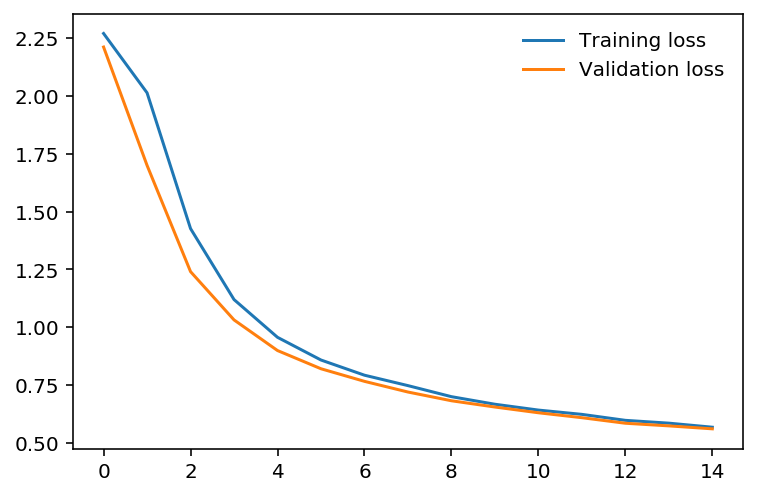

In [13]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

### Realizar la inferencia

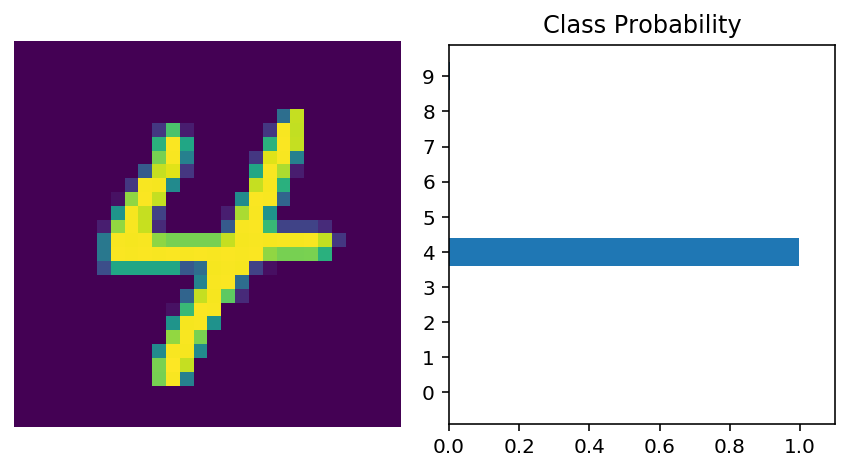

In [14]:
# Import helper module (should be in the repo)
import helper

# Test out your network!

model.eval() ### Prueba los datos

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.view(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)

# Plot the image and probabilities
helper.view_classify(img.view(1, 28, 28), ps, version='MNIST')